In [143]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [144]:
df = pd.read_csv('/Users/eshanakshata/Desktop/Cardiotocographic.csv')

In [145]:
df


,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,73.0,0.5,43.000000,2.4,64.0,0.999926,2.000000
1,132.000000,0.006380,0.000000,0.006380,0.003190,0.0,0.0,17.0,2.1,0.000000,10.4,130.0,0.000000,1.000000
2,133.000000,0.003322,0.000000,0.008306,0.003322,0.0,0.0,16.0,2.1,0.000000,13.4,130.0,0.000000,1.000000
3,134.000000,0.002561,0.000000,0.007742,0.002561,0.0,0.0,16.0,2.4,0.000000,23.0,117.0,1.000000,1.000000
4,131.948232,0.006515,0.000000,0.008143,0.000000,0.0,0.0,16.0,2.4,0.000000,19.9,117.0,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2121,140.000000,0.000000,0.961268,0.007426,0.000000,0.0,0.0,79.0,0.2,25.000000,7.2,40.0,0.000000,2.000000
2122,140.000000,0.000775,0.000000,0.006979,0.000000,0.0,0.0,78.0,0.4,22.000000,7.1,66.0,1.000000,2.000000
2123,140.000000,0.000980,0.000000,0.006863,0.000000,0.0,0.0,79.0,0.4,20.000000,6.1,67.0,1.000000,1.990464
2124,140.000000,0.000679,0.000000,0.006110,0.000000,0.0,0.0,78.0,0.4,27.000000,7.0,66.0,1.000000,2.000000


In [146]:
df.head()

,LB,AC,FM,UC,DL,DS,DP,ASTV,MSTV,ALTV,MLTV,Width,Tendency,NSP
0,120.000000,0.000000,0.0,0.000000,0.000000,0.0,0.0,73.0,0.5,43.0,2.4,64.0,0.999926,2.0
1,132.000000,0.006380,0.0,0.006380,0.003190,0.0,0.0,17.0,2.1,0.0,10.4,130.0,0.000000,1.0
2,133.000000,0.003322,0.0,0.008306,0.003322,0.0,0.0,16.0,2.1,0.0,13.4,130.0,0.000000,1.0
3,134.000000,0.002561,0.0,0.007742,0.002561,0.0,0.0,16.0,2.4,0.0,23.0,117.0,1.000000,1.0
4,131.948232,0.006515,0.0,0.008143,0.000000,0.0,0.0,16.0,2.4,0.0,19.9,117.0,1.000000,1.0


In [147]:
#check all the null values

df.isna().sum()

LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64

In [148]:
# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)


LB          21
AC          20
FM           0
UC           0
DL           0
DS          21
DP          21
ASTV         0
MSTV         0
ALTV         0
MLTV        21
Width       21
Tendency    21
NSP         21
dtype: int64


In [149]:
data_types = df.dtypes
print(data_types)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


In [150]:
# Handling missing values

# Imputation strategy: Mean imputation for numerical columns
numerical_cols = ['LB', 'AC', 'DS', 'DP', 'MLTV', 'Width', 'Tendency', 'NSP']
for col in numerical_cols:
    df[col].fillna(df[col].mean(), inplace=True)

# Check if missing values have been handled
missing_values_after = df.isnull().sum()
print(missing_values_after)


LB          0
AC          0
FM          0
UC          0
DL          0
DS          0
DP          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
Width       0
Tendency    0
NSP         0
dtype: int64


In [151]:
# Check data types after handling missing values
data_types_after = df.dtypes
print(data_types_after)

LB          float64
AC          float64
FM          float64
UC          float64
DL          float64
DS          float64
DP          float64
ASTV        float64
MSTV        float64
ALTV        float64
MLTV        float64
Width       float64
Tendency    float64
NSP         float64
dtype: object


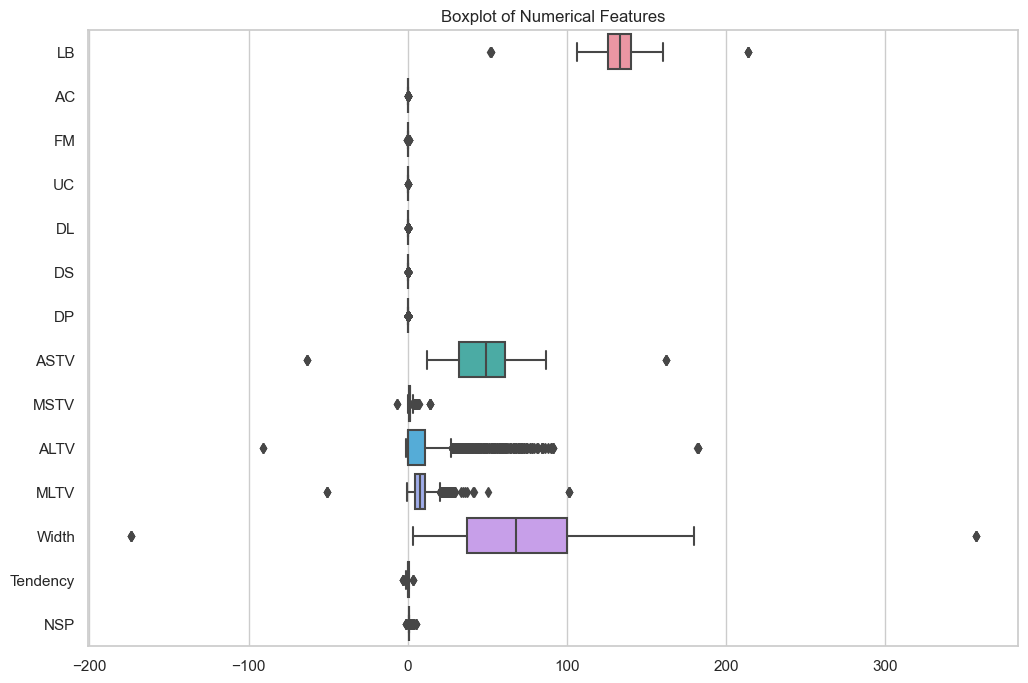

In [152]:
# Visualize potential outliers using box plots
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot of Numerical Features')
plt.show()

In [153]:
# Statistical summary of each variable in the dataset
statistical_summary = df.describe()

# Calculate interquartile range (IQR) for each variable
iqr = df.quantile(0.75) - df.quantile(0.25)
statistical_summary.loc['IQR'] = iqr

print(statistical_summary)

                LB           AC           FM           UC           DL  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.343598     0.003219     0.009894     0.004391     0.001895   
std      11.214328     0.004370     0.067540     0.003340     0.003343   
min      51.842487    -0.019284    -0.480634    -0.014925    -0.015393   
25%     126.000000     0.000000     0.000000     0.001851     0.000000   
50%     133.000000     0.001668     0.000000     0.004484     0.000000   
75%     140.000000     0.005606     0.002567     0.006536     0.003289   
max     214.000000     0.038567     0.961268     0.030002     0.030769   
IQR      14.000000     0.005606     0.002567     0.004685     0.003289   

                DS           DP         ASTV         MSTV         ALTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean      0.000003     0.000175    46.995984     1.364378    10.285964   
std       0.000141     0.000836    18

In [154]:
#Wide Range in Baseline Fetal Heart Rate (LB):The mean is 133.34 with a standard deviation of 11.21, indicating variability.
#The range from minimum (51.84) to maximum (214) is quite large, suggesting some extreme values or potential errors in data entry.

#Low Activity in Some Metrics: Variables like AC, FM, UC, DL, DS, DP have very low means close to zero, indicating low activity in these metrics for most observations.

#High Variability in Short Term Variability (MSTV):The standard deviation of MSTV is relatively high compared to its mean (1.17 vs. 1.36), indicating significant fluctuations in short-term variability among fetuses.


#Significant Outliers in Accelerations (AC):The maximum value is much higher than the 75th percentile, suggesting the presence of significant outliers.

#Interquartile Range (IQR) Insights: The IQR for variables like LB, Width, and MSTV are relatively high, indicating a wide middle 50% range in these measurements.


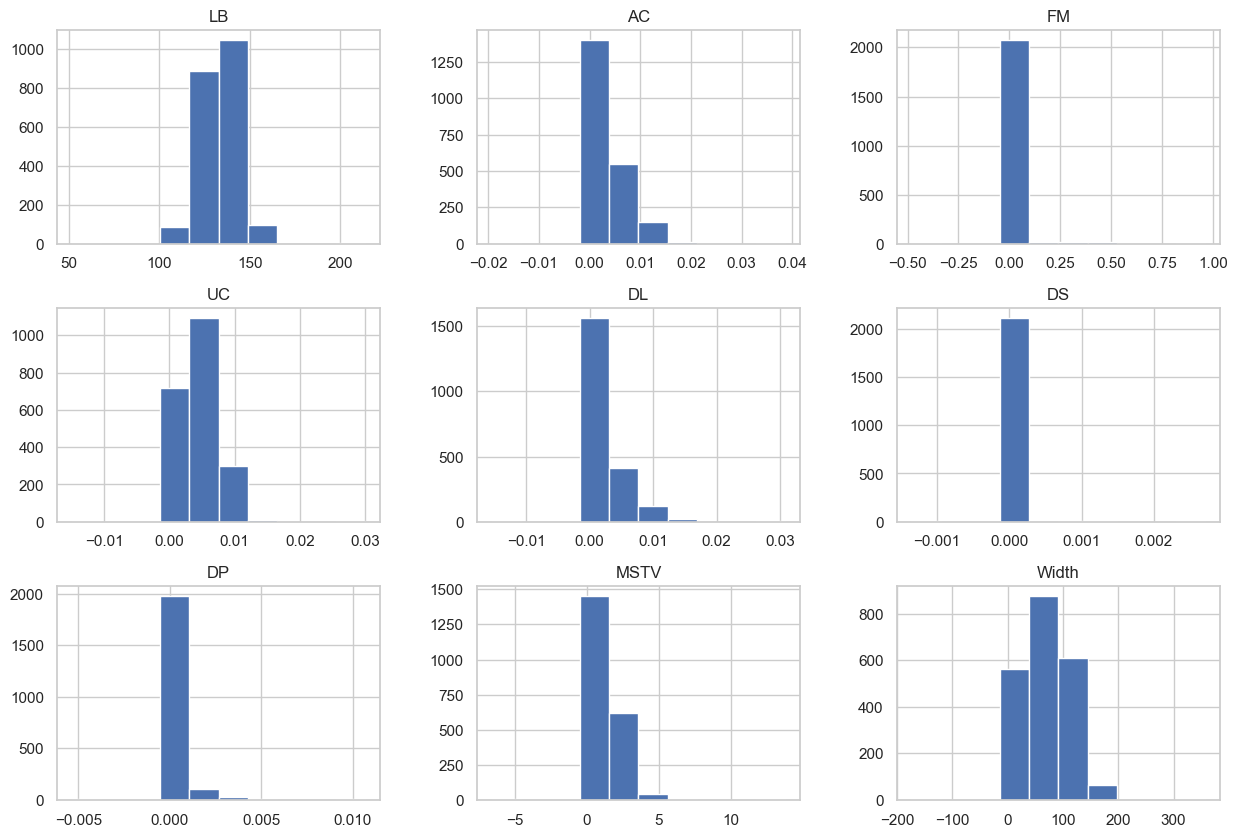

In [161]:
# Histograms for numerical variables
numerical_cols = ['LB', 'AC', 'FM', 'UC', 'DL', 'DS', 'DP', 'MSTV', 'Width']
df[numerical_cols].hist(figsize=(15, 10))
plt.show()

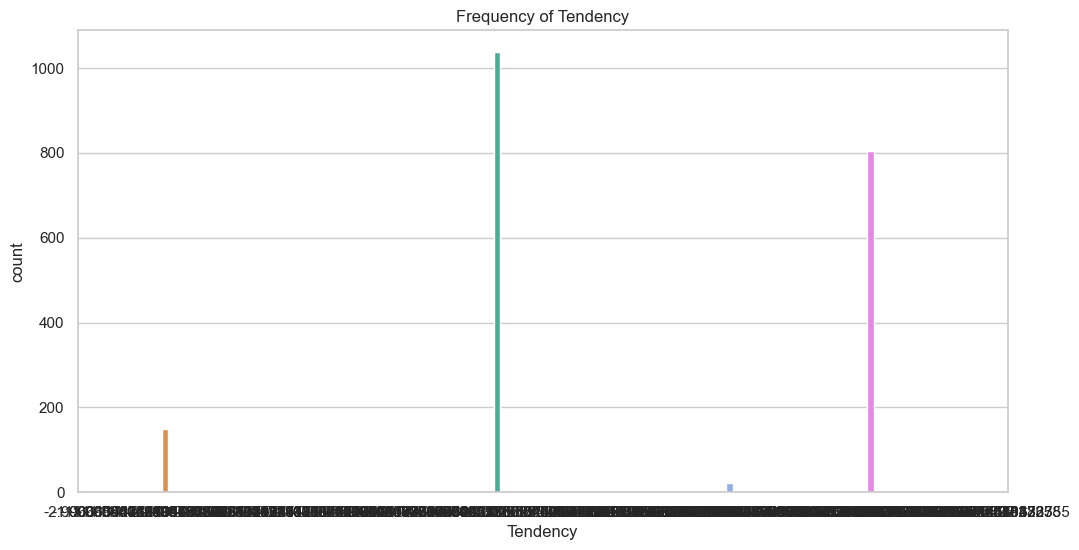

In [164]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Tendency')
plt.title('Frequency of Tendency')
plt.show()

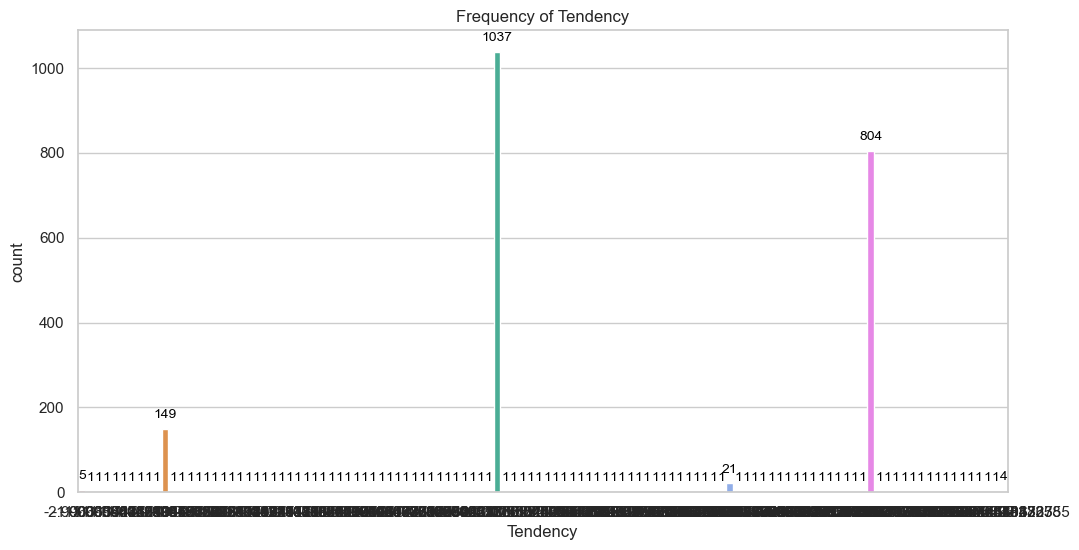

In [166]:
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df, x='Tendency')
plt.title('Frequency of Tendency')

# Displaying values on top of bars with spacing
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points',
                fontsize=10,  # Adjust font size if needed
                color='black')  # Adjust color if needed

plt.show()

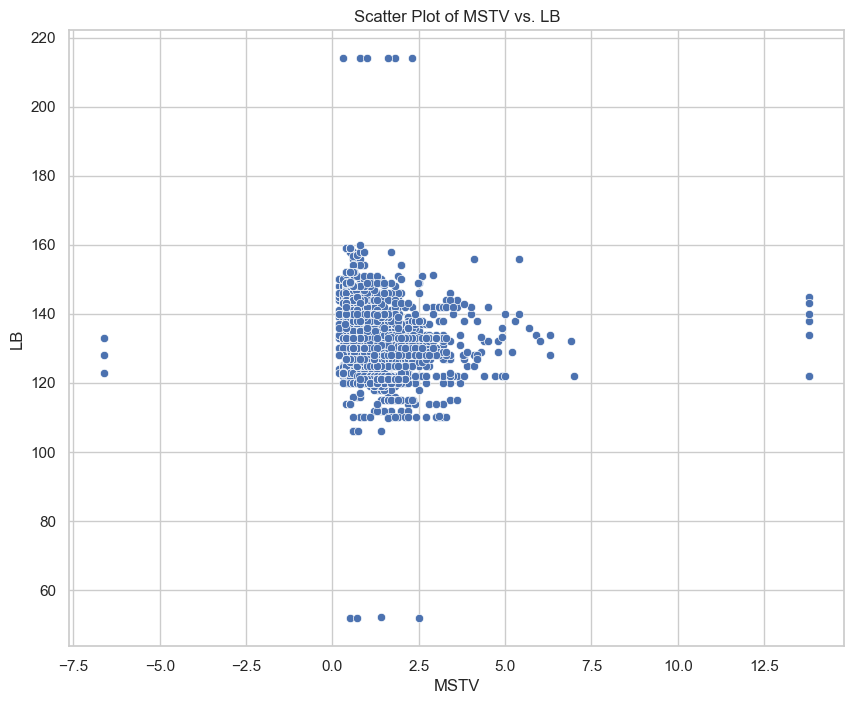

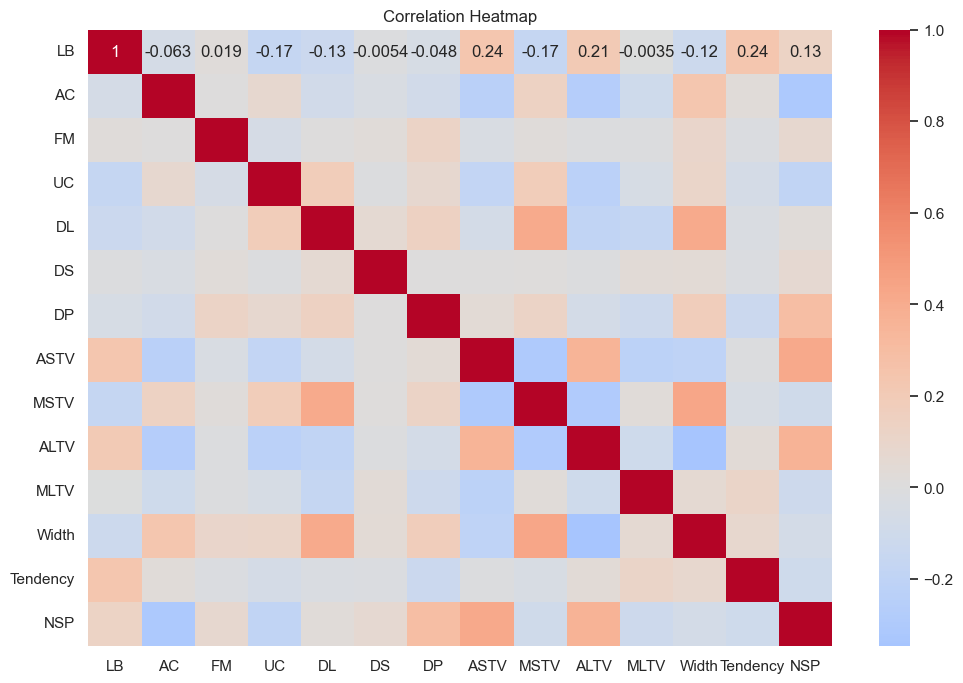

In [170]:
# Scatter Plot
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='MSTV', y='LB')
plt.title('Scatter Plot of MSTV vs. LB')
plt.show()


# correlation heatmaps
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap')
plt.show()

/Users/eshanakshata/Desktop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/eshanakshata/Desktop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/eshanakshata/Desktop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/eshanakshata/Desktop/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option i

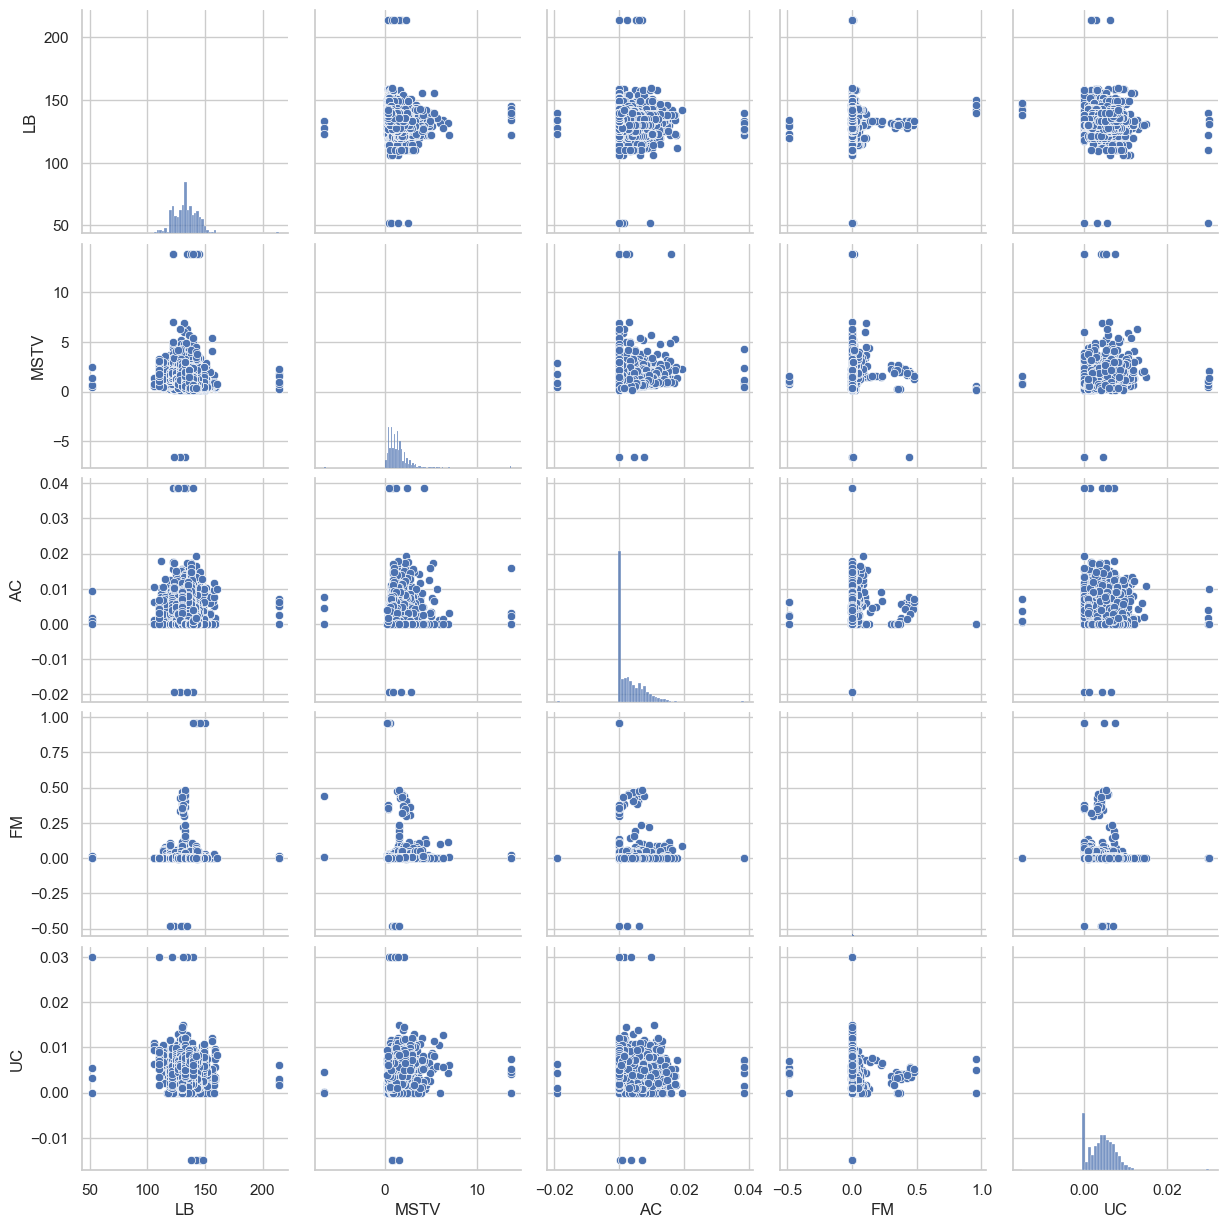

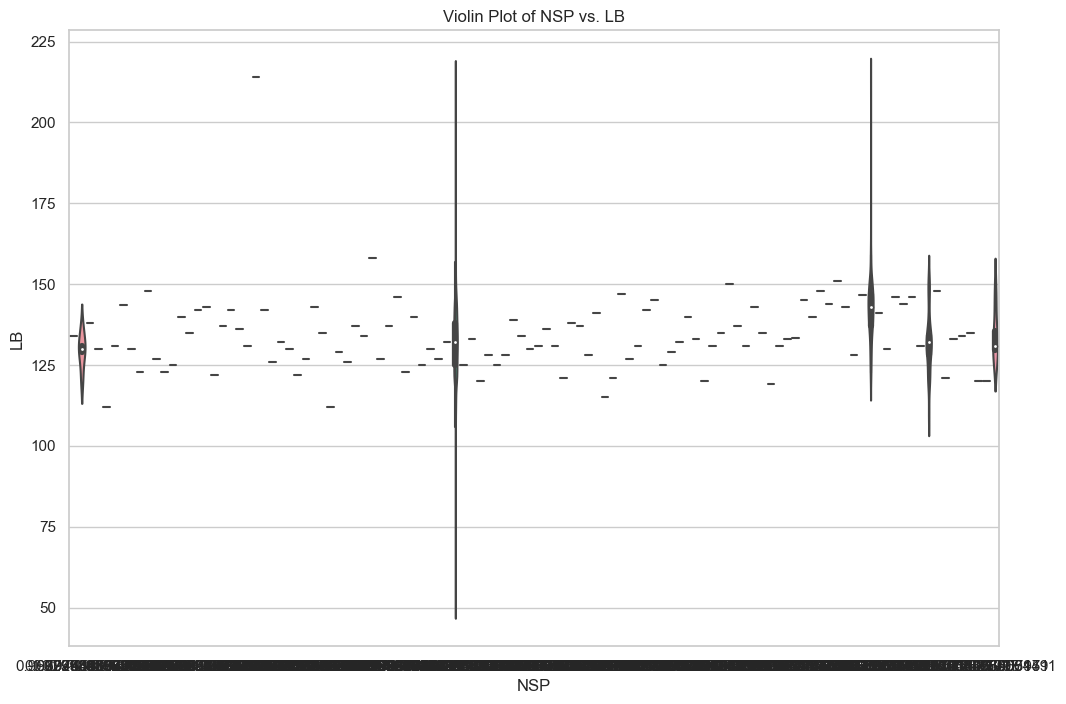

In [168]:
#Positive Correlation :
#There are several pairs of variables that exhibit a positive correlation. 
#Notably, the cells that are distinctly red indicate a stronger positive correlation. 
#For example, the correlation between LB and AC is slightly positive, as indicated by a light red color.

#Negative Correlation :
#Negative correlations are indicated by blue cells. For instance, LB and DP show a negative correlation, as the cell is colored light blue.


#No Correlation :
#Cells that are white or very light in color indicate no or very little correlation. 
#An example is the correlation between LB and DL, which is very close to zero.







# Pair Plot
sns.pairplot(df[['LB', 'MSTV', 'AC', 'FM', 'UC']])
plt.show()

# Violin Plot
plt.figure(figsize=(12, 8))
sns.violinplot(data=df, x='NSP', y='LB')
plt.title('Violin Plot of NSP vs. LB')
plt.show()


In [169]:
#Based on the exploratory analysis of the dataset, several key insights and patterns have been discovered:

#Wide Range in Baseline Fetal Heart Rate (LB): The mean baseline fetal heart rate is 133.34 with a standard deviation of 11.21, indicating significant variability. The range from minimum (51.84) to maximum (214) is large, suggesting potential extreme values or errors in data entry.

#Low Activity in Some Metrics: Variables like AC, FM, UC, DL, DS, DP have very low means close to zero, indicating low activity in these metrics for most observations.

#High Variability in Short Term Variability (MSTV): The standard deviation of MSTV is relatively high compared to its mean (1.17 vs. 1.36), indicating significant fluctuations in short-term variability among fetuses.

#Significant Outliers in Accelerations (AC): The maximum value of AC is much higher than the 75th percentile, suggesting the presence of significant outliers.

#Interquartile Range (IQR) Insights: The IQR for variables like LB, Width, and MSTV are relatively high, indicating a wide middle 50% range in these measurements.

In [ ]:
#These findings could impact decision-making or further analyses in several ways:

#Medical Decision-making: Understanding the variability in fetal heart rate and activity metrics can help medical professionals assess the health of the fetus more accurately and make informed decisions regarding care.

#Data Quality Check: The presence of extreme values or potential errors in data entry should be investigated further to ensure the reliability of the dataset for analysis.

#Feature Selection: Variables with low activity or high variability could be considered for feature selection in predictive modeling to identify important factors affecting fetal health.

#Outlier Detection: The presence of outliers, especially in metrics like accelerations, may require special attention in further analyses to determine their impact on the overall dataset.

#Further Analysis: The identified patterns and insights can guide further analyses, such as clustering to identify subgroups of fetuses with similar characteristics or predictive modeling to forecast fetal health outcomes.